In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import stats
from scipy.stats import norm

# Data preprocessing

In [3]:
dat_wat_or = pd.read_csv("water.csv")
dat_wat_or.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
dat_wat = pd.read_csv("water.csv")
dat_wat.columns = ["V"+str(i) for i in range(1, len(dat_wat.columns)+1)]  # rename column names to be similar to R naming convention
X = dat_wat.loc[:, "V2":]  # independent variables data
y = dat_wat.V1  # dependednt variable data
dat_wat.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
# pd.summary(dat_wat)
dat_wat.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
dat_wat = dat_wat.dropna(axis=0)
dat_wat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      2011 non-null   float64
 1   V2      2011 non-null   float64
 2   V3      2011 non-null   float64
 3   V4      2011 non-null   float64
 4   V5      2011 non-null   float64
 5   V6      2011 non-null   float64
 6   V7      2011 non-null   float64
 7   V8      2011 non-null   float64
 8   V9      2011 non-null   float64
 9   V10     2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


# Visualizing the data

In [7]:
# dat_wat = pd.read_csv("water.csv")
# dat_wat.columns = ["V"+str(i) for i in range(1, len(dat_wat.columns)+1)]  # rename column names to be similar to R naming convention
# X = dat_wat.loc[:, "V2":]  # independent variables data
# y = dat_wat.V1  # dependednt variable data
# dat_wat.head(10)

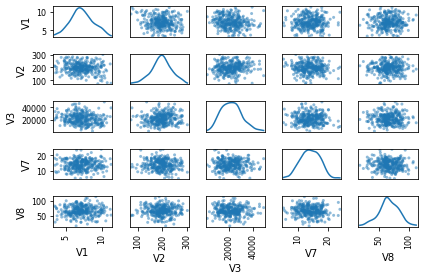

In [8]:
# let's have a look at the data:
pd.plotting.scatter_matrix(dat_wat.loc[:500, ['V1', 'V2', 'V3', 'V7', 'V8']], diagonal="kde")
plt.tight_layout()
plt.show()

# Step 1

You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

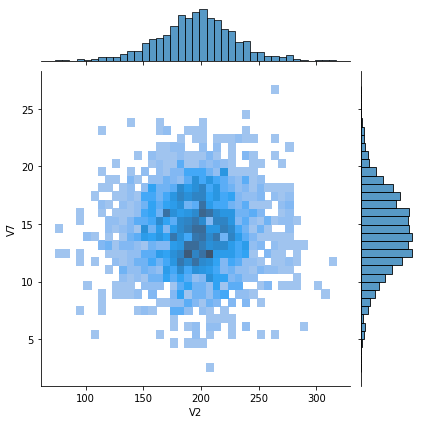

In [9]:
# 1. continuous random variables:

g = sns.jointplot(data=dat_wat, x='V2', y='V7', kind="hist",
                  ratio=5)
plt.show()

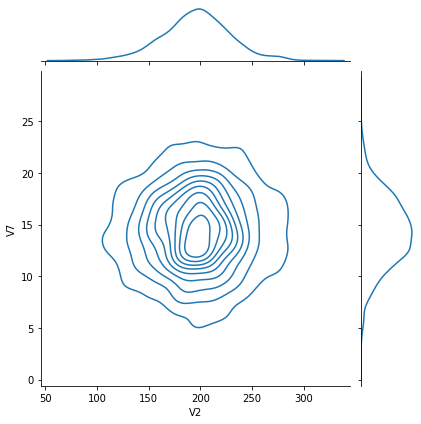

In [10]:
g = sns.jointplot(data=dat_wat, x='V2', y='V7', kind="kde",
                  ratio=5)
plt.show()

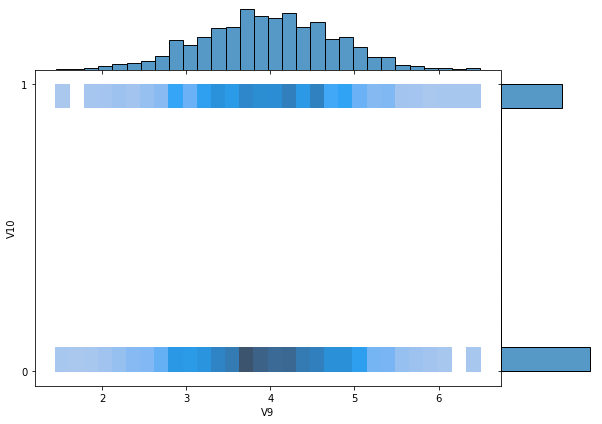

In [109]:
# 2. discrete random variables (one continuous and one discrete)
g = sns.jointplot(data=dat_wat, x='V9', y='V10', kind="hist",
                  ratio=5, space=0)
plt.yticks([0.0, 1.0])
g.fig.set_figwidth(9)
g.fig.set_figheight(6)

plt.show()

# Step 2

You need to make an estimation of multivariate mathematical expectation and variance.

In [12]:
dat_wat.apply(np.mean)

V1         7.085990
V2       195.968072
V3     21917.441374
V4         7.134338
V5       333.224672
V6       426.526409
V7        14.357709
V8        66.400859
V9         3.969729
V10        0.403282
dtype: float64

In [13]:
dat_wat.apply(np.std)

V1        1.572945
V2       32.626969
V3     8640.090806
V4        1.584426
V5       41.194926
V6       80.692502
V7        3.324132
V8       16.073112
V9        0.780152
V10       0.490556
dtype: float64

# Step 3

You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

In [14]:
# Feature V10 is binary (discrete), let's get a subset of the dataset, where V10 is equal to 1

water_type1 = dat_wat[dat_wat['V10']==1]
water_type1.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0
mean,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254,1.0
std,1.437623,35.301146,8891.547966,1.732796,47.446190,81.950982,3.257917,16.297713,0.776408,0.0
min,0.227499,73.492234,1198.943699,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.256039,174.380497,15816.076607,6.106169,301.768819,360.275012,12.148355,55.751069,3.440564,1.0
50%,7.046549,197.617494,21217.158596,7.212254,331.087177,421.099917,14.252684,66.612984,4.007347,1.0
75%,7.955161,218.414531,27696.134419,8.181431,365.632984,482.296528,16.561121,77.372587,4.527463,1.0
max,11.898078,317.338124,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [15]:
water_type1.drop('V10', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
water_type1.apply(np.mean)

V1        7.113791
V2      195.908341
V3    22344.922883
V4        7.174395
V5      332.457832
V6      425.005423
V7       14.294764
V8       66.581596
V9        3.991254
dtype: float64

In [17]:
water_type1.apply(np.std)

V1       1.436736
V2      35.279376
V3    8886.064433
V4       1.731727
V5      47.416929
V6      81.900442
V7       3.255908
V8      16.287662
V9       0.775929
dtype: float64

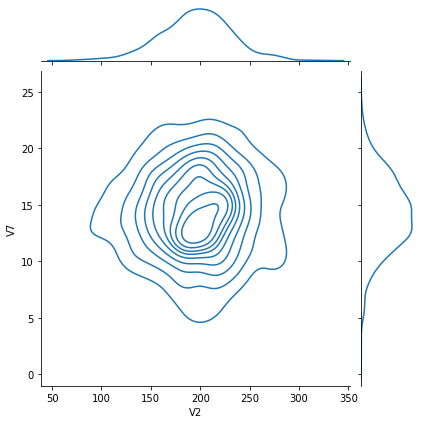

In [18]:
g = sns.jointplot(data=water_type1, x='V2', y='V7', kind="kde",
                  ratio=5)
plt.show()

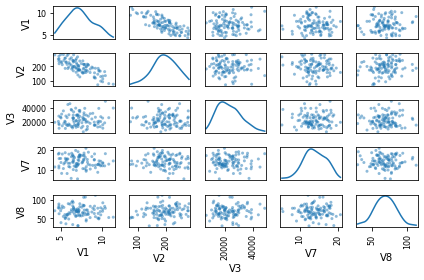

In [19]:
# let's have an overall look at the distributions:
pd.plotting.scatter_matrix(water_type1.loc[:500, ['V1', 'V2', 'V3', 'V7', 'V8']], diagonal="kde")
plt.tight_layout()
plt.show()

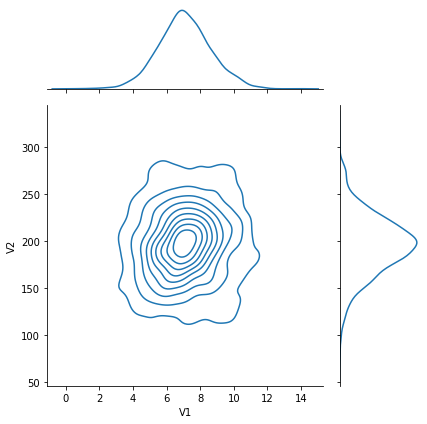

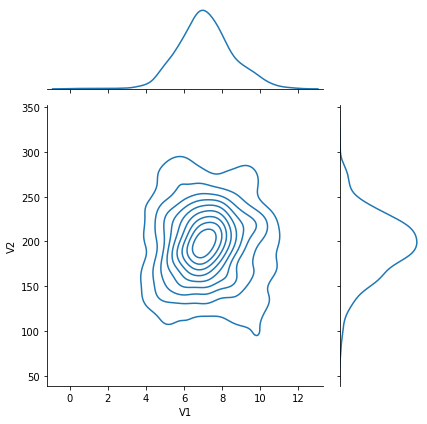

In [20]:
# We can see that the trend of V1-V2 relationship changed greatly compared to the main dataset,
# let's have a closer look at their relation and compare it with the one in the main dataset:

g1 = sns.jointplot(data=dat_wat, x='V1', y='V2', kind="kde",
                  ratio=3)
g2 = sns.jointplot(data=water_type1, x='V1', y='V2', kind="kde",
                  ratio=3)
plt.show()

# Step 4

You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [86]:
# Let's estimate pair coefficient of correlation for V5 and V3
V5_m = np.mean(dat_wat.V5)
V3_m = np.mean(dat_wat.V3)

In [91]:
difV5 = dat_wat.V5-V5_m
difV3 = dat_wat.V3-V3_m

In [98]:
rV5V3 = np.sum(difV5*difV3) / np.sqrt(np.sum(difV5**2)*np.sum(difV3**2))

rV5V3

-0.16276920425470223

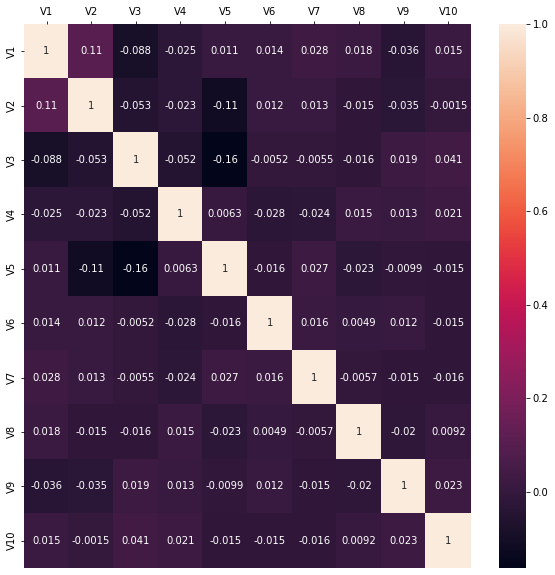

In [21]:
# correlation for all pairs:
corrmat = dat_wat.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrmat, vmax=1., square=False, annot=True).xaxis.tick_top()

In [22]:
print(stats.pearsonr(dat_wat.V5,dat_wat.V3)) # Pearson
# we get the same results as in the correlation matrix and absolutely the same as 
# when we used the estimation formula for pair coefficient of correlation calculation
# also p-value << 0.05 => the correlation is statistically significant

'''A p-value is the probability that the null hypothesis is true. 
In our case, it represents the probability that the correlation between x and y in the sample data occurred by chance. 
A p-value of 0.05 means that there is only 5% chance that results from your sample occurred due to chance. 

0-hyposesis: ρ = 0 
alternative: ρ != 0 

If the P-value is smaller than the significance level (α = 0.05), 
we reject the null hypothesis in favor of the alternative. We conclude that the correlation is statistically significant. 
or in simple words “ we conclude that there is a linear relationship between x and y in the population at the α level ”
'''

(-0.1627692042547022, 2.077119092817017e-13)


'A p-value is the probability that the null hypothesis is true. \nIn our case, it represents the probability that the correlation between x and y in the sample data occurred by chance. \nA p-value of 0.05 means that there is only 5% chance that results from your sample occurred due to chance. \n\n0-hyposesis: ρ = 0 \nalternative: ρ != 0 \n\nIf the P-value is smaller than the significance level (α = 0.05), \nwe reject the null hypothesis in favor of the alternative. We conclude that the correlation is statistically significant. \nor in simple words “ we conclude that there is a linear relationship between x and y in the population at the α level ”\n'

In [23]:
# Example with high p-value:
print(stats.pearsonr(dat_wat.V5,dat_wat.V4)) 

(0.006254057456839653, 0.7792577775838295)


In [24]:
dat_wat.V5.size

2011

In [25]:
# Confidence interval for the correlation coefficient
r, p = stats.pearsonr(dat_wat.V5,dat_wat.V3)
r_z = np.arctanh(r) # Fisher transformation

''' The Fisher Z-Transformation is a way to transform the sampling distribution of 
  Pearsons r (i.e. the correlation coefficient) so that it becomes normally distributed.
  When the sample correlation coefficient r is near 1 or -1, 
  its distribution is highly skewed (asymmetry of the probability distribution about its mean), 
  which makes it difficult to estimate confidence intervals.
  The Fisher transformation solves this problem by yielding a variable 
  whose distribution is approximately normally distributed, with a variance that is stable over different values of r.
'''


# Corresponding standard deviation
se = 1/np.sqrt(dat_wat.V5.size-3) 
alpha = 0.05
z = norm.ppf(1-alpha/2)

# Corr. coeff. and confidence interval
lo_z, hi_z = r_z-z*se, r_z+z*se

print('Correlation coefficient = ', r)
print('Confidence interval for the correlation coefficient ', lo_z, hi_z)

''' A confidence interval for a correlation coefficient is a range of values 
 that is likely to contain a population correlation coefficient with a certain level of confidence. '''

Correlation coefficient =  -0.1627692042547022
Confidence interval for the correlation coefficient  -0.2079686919050719 -0.12049121818893616


' A confidence interval for a correlation coefficient is a range of values \n that is likely to contain a population correlation coefficient with a certain level of confidence. '

# Step 5

Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

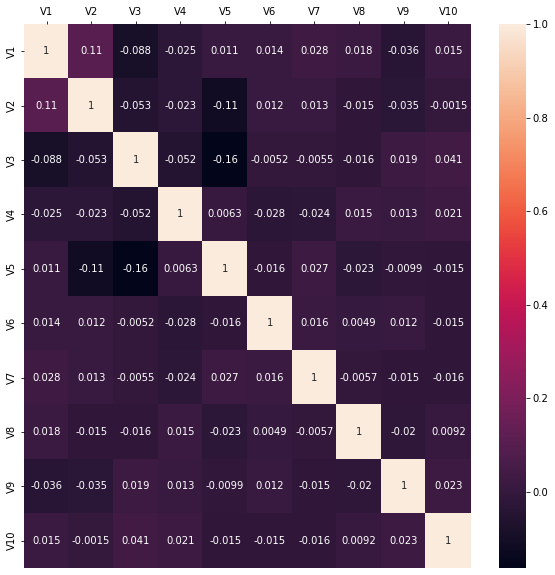

In [26]:
# multivariate correlation for ALL variables
corrmat = dat_wat.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrmat, vmax=1., square=False, annot=True).xaxis.tick_top()

In [27]:
features = dat_wat.drop('V3', 1) #axis=1
y = dat_wat['V3']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [28]:
features.head()

,V1,V2,V4,V5,V6,V7,V8,V9,V10
3,8.316766,214.373394,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


# Step 6

Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [29]:
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [30]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  6725.2389189102
Mean squared error =  71169469.6615913


In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  51.816154427913574


In [32]:
'''The model can't predict well => try another model'''
# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-5.28914259e+02 -1.59820527e+01 -4.43003764e+02 -3.22964866e+01
 -9.72234896e-01  2.25862347e+01 -2.29270937e+00 -4.09087619e+01
  1.25126623e+03]


In [33]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Mean absolute error with lasso =  6725.2131948101305
Mean squared error with lasso =  71168901.65938598
Mean absolute error with aic lasso =  6721.137197485269


In [56]:
'''Multicollinearity exists whenever an independent variable is highly correlated 
with one or more of the other independent variables in a multiple regression equation. 
Multicollinearity is a problem because it undermines the statistical significance of an independent variable

Multicollinearity in this task can be analysed by means of correlation matrix - we can see that the highest coefficients is
V1-V2, V5-V2, V5-V3 relations, that's why let has V5 as a target variable and V2, V3 as its main features'''


features = dat_wat.drop('V5', 1) #axis=1
features = features.drop(['V10', 'V8'], 1)
y = dat_wat['V5']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [47]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  31.225559313620895
Mean squared error =  1604.9808298320304


In [49]:
features.head()

,V1,V2,V3,V4,V6,V7,V9
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708
6,10.223862,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989
7,8.635849,203.361523,13672.091764,4.563009,474.607645,12.363817,4.401425


In [53]:
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

In [54]:
'''The error is still high, may be regularization will be of help'''

# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.36498283 -4.78035979 -6.27024772  0.71677023 -0.91683288  0.709727
 -0.56464259]


In [55]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)

y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  31.214094951799247
Mean squared error with lasso =  1604.1934919306989
Mean absolute error with aic lasso =  31.166651373484832


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [81]:
'''Regularization didn't give any results, probably because linear correlation between target and features is weak,
that's why the next and the last step will be polynomial regression'''
d = 3

poly = PolynomialFeatures(d)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(d)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)

X_new = poly.fit_transform(features)
y_pred_poly_all = reg.predict(X_new)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error with Polynomial model = ', mae_poly)
print('Mean squared error with Polynomial model = ', mse_poly)

Mean absolute error with Polynomial model =  31.477549643139657
Mean squared error with Polynomial model =  1560.74869813326


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Text(0, 0.5, 'Sulfate')

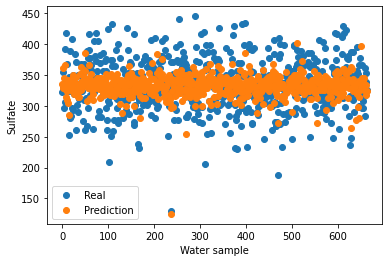

In [82]:
x = []
# Visualization of real and predicted values
for i in range(len(y_test)):
    x.append(i)

plt.scatter(x, y_test, label = u'Real')
plt.scatter(x, y_pred_poly, label = u'Prediction')
plt.legend()
plt.xlabel('Water sample')
plt.ylabel('Sulfate')

Text(0, 0.5, 'Sulfate')

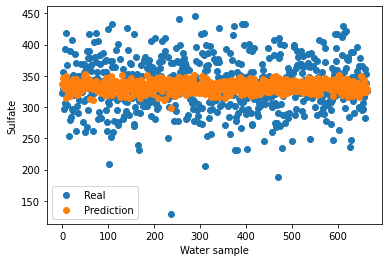

In [80]:
plt.scatter(x, y_test, label = u'Real')
plt.scatter(x, y_pred, label = u'Prediction')
plt.legend()
plt.xlabel('Water sample')
plt.ylabel('Sulfate')

In [ ]:
'''Polynomial regression though have higher MAE gives lower MSE and it also looks to be a
vizually better choice compared to linear regression'''

# Step 7

Analyze the quality of regression model (distribution of residuals determination coefficient).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


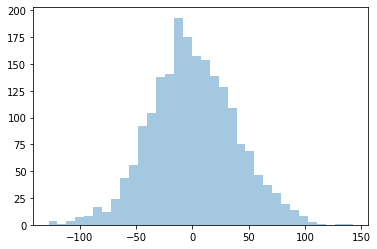

In [84]:
'''For the chosen dataset regression can not give a good result, but among models
the best one was polynomial'''

# Plotting the distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_poly_all)
y_diff = y1 - y2
sns.distplot(y_diff, kde=False)

In [103]:
# Metrics of the model:
rmse_poly = np.sqrt(((y_pred_poly - y_test) ** 2).mean())

print('MAE::', mae_poly)
print('MSE:', mse_poly)
print('RMSE:', rmse_poly)

MAE:: 31.477549643139657
MSE: 1560.74869813326
RMSE: 39.5063121302566


In [101]:
'''Determination coefficient or r-squared value (R^2 notation) represents the proportion of variation in y
 (about its mean) explained by the multiple linear regression model with specified predictors'''

sse = np.sum((y_pred_poly - y_test)**2)
ssto = np.sum((y_test - np.mean(y_test))**2)
determinanation_coeff = 1 - sse / ssto

determinanation_coeff

0.06992064075538729